In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#dataset containing faces
from sklearn.datasets import fetch_lfw_people

#dataset images étiquetées
people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# largeur et longueur des images
n_samples, h, w = people.images.shape
#données, (chaque image est dans un tableau ou vecteur 1 dimension) 
X = people.data
#étiquettes de chaque image ex f(X[0]) = Y[0] = 5 => names[5] = "G. bush"
Y = people.target
names = people.target_names
#Le but de l'exercice est donc de créer cette fonction f(x) qui quand on lui fournit une image, nous donne le nom de la personne 


![](EquationsImages/meanImages.png)


Text(0.5, 1.0, 'Visage moyen creepy shit')

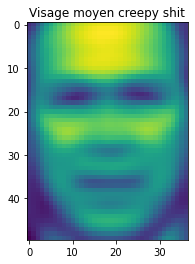

In [2]:
#Calculons la moyenne des visages :o
visageMoyen = np.zeros(h*w) #Initialisser un tableau numpy vide 1 dimension
#Ajouter toutes les images
for image in X:
    visageMoyen = np.add(image,visageMoyen)
#Diviser par le nombre d'images
visageMoyen = np.divide(visageMoyen,len(X))
plt.imshow(visageMoyen.reshape((h,w)))
plt.title("Visage moyen creepy shit")


In [3]:
# On soustrait à chaque image la moyenne, afin d'avoir uniquement les informations qui caractérisent chaque image
for i in range(len(X)):
    X[i] = np.subtract(X[i],visageMoyen)

In [4]:
# Desormais on calcule la matrice de covariance A dont les colonnes sont les images, et les lignes sont les coordonnées
# On possède une dataSet de 1228 images
# décrivants l'image ex image1=(1,0,255,23,...) dim(image1) = h*w = 1850
# A est donc une matrice de 1228 colonnes par 1850 lignes

# la matrice de covariance K(x) est définie comme suit
![](EquationsImages/covarianceMat.png)
# Notre matrice A est définie comme suit
![](EquationsImages/matrixA.png)

# Ayant deja éffectuer la moyenne, et en l'ayant soustrait, la formule des covariance qui constituent notre matrice de covariance se définient comme suit:
![](EquationsImages/lagrida_latex_editor.png)
# On a donc plus généralement :
![](EquationsImages/lagrida_latex_editorr.png)

In [5]:
# Il se trouve que notre matrice A est justement la matrice X
A = np.copy(X)


<AxesSubplot:>

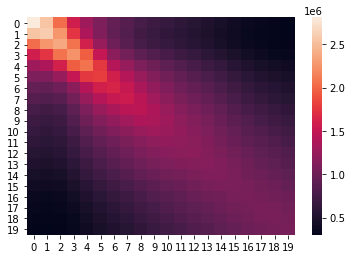

In [6]:
# On construit la matrice de correlaction K qui sera de 1850 colonnes par 1850 lignes K = At * A
K = np.matmul(np.transpose(A),A)
sns.heatmap(K[0:20,0:20])

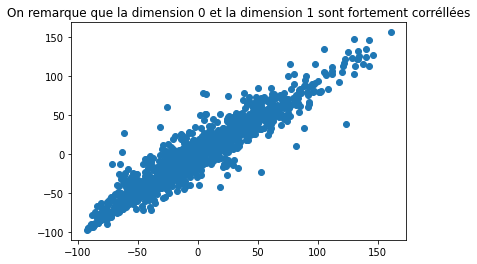

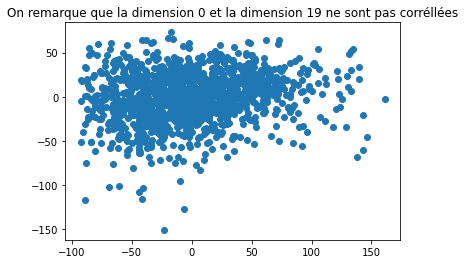

In [8]:
def showEllipsoid(dim1, dim2):
    plt.scatter(A[0:1288,dim1],A[0:1288,dim2])
plt.figure()
plt.title("On remarque que la dimension 0 et la dimension 1 sont fortement corréllées")
showEllipsoid(0,1)
plt.figure()
plt.title("On remarque que la dimension 0 et la dimension 19 ne sont pas corréllées")
showEllipsoid(0,19)

#fonction pour avoir les n vecteur propres, on utilisera pour l'interface graphique afin d'avoir un resultat + ou - précis
def getNEigenVectors(n):
    pass